# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [2]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [3]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        
        for i in range(0, n):
            positions[i] = self.pos
            self.pos += self.pickStep()
        positions[n] = self.pos
        
        return positions

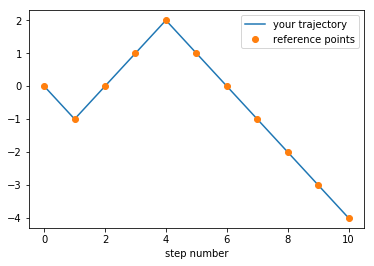

In [4]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

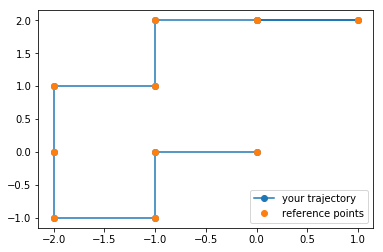

In [5]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

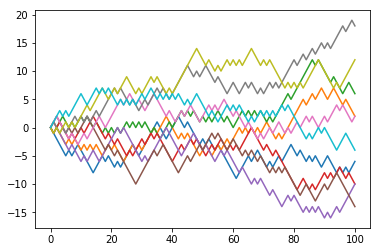

In [6]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


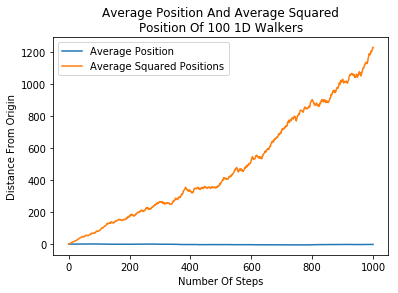

In [7]:
nsteps = 1000
ndim = 1
nwalkers = 100
av_pos = numpy.zeros(nsteps+1)
av_pos_sq = numpy.zeros(nsteps+1)

for i in range(0, nwalkers):
    w = walker(numpy.zeros(1))
    pos = w.doSteps(nsteps)[:,0]
    av_pos += pos
    av_pos_sq  += pos**2
av_pos = av_pos/nwalkers
av_pos_sq = av_pos_sq/nwalkers
steps_array = range(0, nsteps+1)

plt.plot(steps_array, av_pos, label="Average Position")
plt.plot(steps_array, av_pos_sq, label="Average Squared Positions")
plt.xlabel("Number Of Steps")
plt.ylabel("Distance From Origin")
plt.title("Average Position And Average Squared\nPosition Of 100 1D Walkers")
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


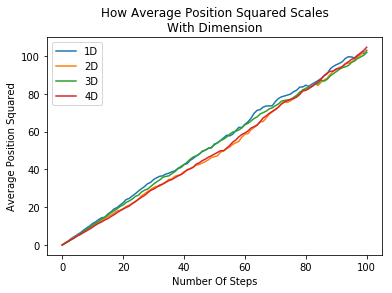

In [8]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
steps_array = range(0, nsteps+1)
labels = ["0D", "1D", "2D", "3D", "4D"]

for j in dimensions:
    av_pos_sq = numpy.zeros(nsteps+1)

    for i in range(0, nwalkers):
        w = walker(numpy.zeros(j), ndim=j)   
        pos = w.doSteps(nsteps)
        distance_sq = numpy.zeros(nsteps+1)
        
        for k in range(0, j):
            distance_sq += (pos[:,k])**2
        
        av_pos_sq += distance_sq
            
    av_pos_sq = av_pos_sq/nwalkers
    plt.plot(steps_array, av_pos_sq, label= labels[j])

plt.xlabel("Number Of Steps")
plt.ylabel("Average Position Squared")
plt.title("How Average Position Squared Scales\nWith Dimension")
plt.legend()


## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


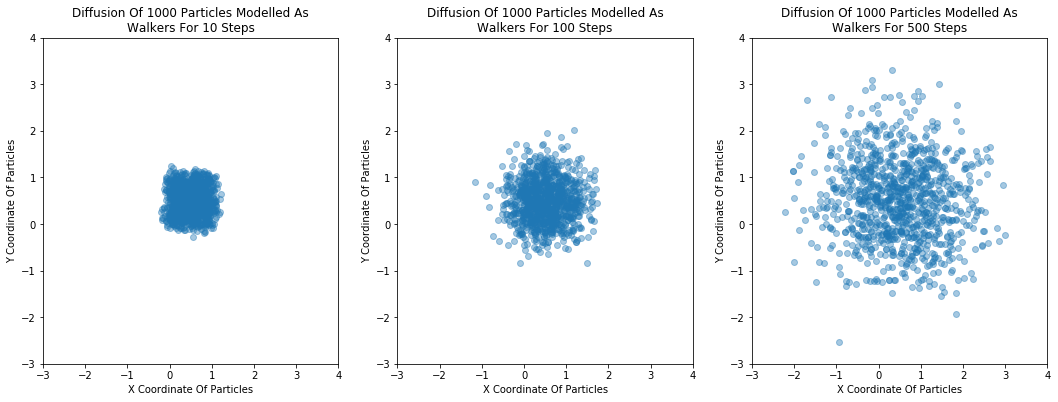

In [13]:
ndim=2 #2D problem
nwalkers=1000
#nsteps1, nsteps2, nsteps3 = 10, 100, 500
s = 0.05 #step size

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
#allpos1, allpos2, allpos3 = numpy.zeros((nwalkers, ndim)), numpy.zeros((nwalkers, ndim)), numpy.zeros((nwalkers, ndim))
#for i in range(0, nwalkers):
#    w = walker(x0 = rand_pos[i], ndim = 2, step_size = s)
#    pos1 = w.doSteps(nsteps1)    #returns and (nsteps1+1)x(ndim) array of all the positions of the walker
#    current_pos1 = pos1[nsteps1] #the final position of the walker (a list of the form [x, y]) after 10 steps
#    allpos1[i] = current_pos1    #an array where each row is a different walker's final (x, y) position
#    pos2 = w.doSteps(nsteps2)    #returns and (nsteps2+1)x(ndim) array of all the positions of the walker
#    current_pos2 = pos2[nsteps2] #the final position of the walker (a list of the form [x, y]) after 100 steps
#    allpos2[i] = current_pos2    #an array where each row is a different walker's final (x, y) position    
#    pos3 = w.doSteps(nsteps3)    #returns and (nsteps3+1)x(ndim) array of all the positions of the walker
#    current_pos3 = pos3[nsteps3] #the final position of the walker (a list of the form [x, y]) after 500 steps
#    allpos3[i] = current_pos3    #an array where each row is a different walker's final (x, y) position
#all_pos = numpy.zeros((3*nwalkers, ndim))
#all_pos[0:nwalkers] = allpos1
#all_pos[nwalkers:2*nwalkers] = allpos2
#all_pos[2*nwalkers:3*nwalkers] = allpos3

#USE A LOOP IN A LOOP - ADVICE FROM POSTGRAD

#this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    pos = numpy.zeros((nwalkers, ndim))
    for j in range(nwalkers):
        w = walker(rand_pos[j], ndim, s)
        ys = w.doSteps(nsteps)
        pos[j] = ys[-1] #ys[-1] is the last row in ys
        
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Diffusion Of 1000 Particles Modelled As\nWalkers For %s Steps" % nsteps)
    plt.xlabel("X Coordinate Of Particles")
    plt.ylabel("Y Coordinate Of Particles")
    plt.scatter(pos[:,0], pos[:,1], alpha=0.4)
#   plt.scatter(all_pos[(i-1)*nwalkers:i*nwalkers, 0], all_pos[(i-1)*nwalkers:nwalkers, 1])